<h1>Supervised Learning Algorithms Comparison with MNIST-Data</h1>
    <h2>Burkhardt Röper</h2>
<p>Testing Scikit-Learn-Classes with preprocessed MNIST-Dataset</p>

<h3>Imports</h3>

In [23]:
# Basics
import pandas as pd
import gzip
import os
import numpy as np

# Visualisation
%matplotlib inline
import matplotlib.pyplot as plt

# Scikit Learn Algos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Scikit Learn Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

<h3>Loading MNIST</h3>

In [2]:
train_data = os.path.join("./", "train-images-idx3-ubyte.gz")
train_labels = os.path.join("./", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("./", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("./", "t10k-labels-idx1-ubyte.gz")

In [3]:
# Division by 255 to speed up compute time

def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset = 16)
        return data.reshape(-1, 28, 28) / 255
    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)

X_train = mnist_images(train_data)
y_train = mnist_labels(train_labels)

X_test = mnist_images(test_data)
y_test = mnist_labels(test_labels)

<h3>First look</h3>

2


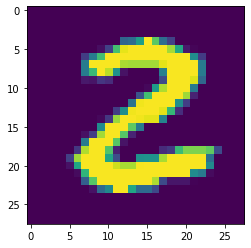

In [4]:
print(y_train[25])
plt.imshow(X_train[25])
plt.show()

<p>Reduces sample for first analysis, to reduce compute time</p>

In [5]:
X_train_1000 = X_train[0:1000]
X_test_1000 = X_test[0:1000]
y_train_1000 = y_train[0:1000]
y_test_1000 = y_test[0:1000]

<h3>Logistic Regression</h3>

In [6]:
# Saga
model = LogisticRegression(solver = "saga", n_jobs = 4)
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)

/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=4, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
model.score(X_test_1000.reshape(-1, 784), y_test_1000)

0.847

In [8]:
# sag
model = LogisticRegression(solver = "sag", n_jobs = 4)
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
model.score(X_test_1000.reshape(-1, 784), y_test_1000)

/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.848

In [9]:
# newton-cg
model = LogisticRegression(solver = "newton-cg", n_jobs = 4)
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
model.score(X_test_1000.reshape(-1, 784), y_test_1000)

/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.843

In [10]:
%%time
# sag wins, so ...
# use sag with the full dataset
# and measure the time

model = LogisticRegression(solver = "sag", n_jobs = 4)
model.fit(X_train.reshape(-1, 784), y_train)
model.score(X_test.reshape(-1, 784), y_test)

/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CPU times: user 4min 51s, sys: 298 ms, total: 4min 51s
Wall time: 1min 26s


0.92

<h3>KNN</h3>

In [11]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
print(model.score(X_test_1000.reshape(-1, 784), y_test_1000))

0.799


In [12]:
%%time
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train.reshape(-1, 784), y_train)
print(model.score(X_test.reshape(-1, 784), y_test))

0.9665
CPU times: user 9min 12s, sys: 180 ms, total: 9min 12s
Wall time: 9min 11s


<p>... took the double of time compared to LR, but the score is significant better :-)</p>

<h3>Naive Bayes</h3>

In [13]:
model = GaussianNB()
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
print(model.score(X_test_1000.reshape(-1, 784), y_test_1000))

0.625


In [16]:
%%time
model = GaussianNB()
model.fit(X_train.reshape(-1, 784), y_train)
print(model.score(X_test.reshape(-1, 784), y_test))

0.5558
CPU times: user 5.13 s, sys: 252 ms, total: 5.38 s
Wall time: 1.11 s


<p>... really fast, but with a disappointing result.<p>

<h3>Decision Tree</h3>

In [17]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
print(model.score(X_test_1000.reshape(-1, 784), y_test_1000))

0.639


In [18]:
%%time
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train.reshape(-1, 784), y_train)
print(model.score(X_test.reshape(-1, 784), y_test))

0.8878
CPU times: user 13.6 s, sys: 59.4 ms, total: 13.6 s
Wall time: 13.6 s


<p>... fast and the second best result. Interesting!</p>

<h3>SVM</h3>

In [19]:
model = SVC(kernel="linear")
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
print(model.score(X_test_1000.reshape(-1, 784), y_test_1000))

0.853


In [20]:
%%time
model = SVC(kernel="linear")
model.fit(X_train.reshape(-1, 784), y_train)
print(model.score(X_test.reshape(-1, 784), y_test))

0.9404
CPU times: user 7min 3s, sys: 1.18 s, total: 7min 4s
Wall time: 7min 3s


<p>... okay, nice result, worth the time. But KNN was slightly better (and took a two minutes longer)</p>

<h3>SVM with Kernel</h3>

<p>First test with fixed hyperparameters</p>

In [21]:
model = SVC(kernel="rbf", gamma=0.01, C=1)
model.fit(X_train_1000.reshape(-1, 784), y_train_1000)
print(model.score(X_test_1000.reshape(-1, 784), y_test_1000))

0.869


<p>Let's create a pipeline to find the best hyperparameters, before going with the full dataset</p>

In [25]:
pipeline = Pipeline([
    ("svm", SVC())
])
clf = GridSearchCV(pipeline, param_grid = {
    "svm__C": [0.001, 0.01, 0.1, 1, 10],
    "svm__gamma": [0.001, 0.01, 0.1, 1, 10]
})
clf.fit(X_train_1000.reshape(-1, 784), y_train_1000)
print(clf.best_params_)
print(clf.score(X_test_1000.reshape(-1, 784), y_test_1000))

/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/roeper/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svm__C': 10, 'svm__gamma': 0.01}
0.885


<p>... with these hyperparameters let's do the final test with the full dataset</p>

In [26]:
%%time
model = SVC(kernel="rbf", gamma=0.01, C=10)
model.fit(X_train.reshape(-1, 784), y_train)
print(model.score(X_test.reshape(-1, 784), y_test))

0.9833
CPU times: user 6min, sys: 925 ms, total: 6min 1s
Wall time: 6min 1s


<h2>... and the winner is: SVM with kernel, with tuned hyperparameters</h2>
<h2>Score 0.9833, time 6:01 minutes</h2>